<a href="https://colab.research.google.com/github/bsenst/LoopOfHenle/blob/main/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# https://colab.research.google.com/drive/1UxZ1M0LNUxjiiImYyzObPmgc7_5DE7OH?usp=sharing

import pandas as pd
import numpy as np
! pip install simple-icd-10
import simple_icd_10 as icd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Loading the Data

In [2]:
lab = pd.read_csv("LabsALL 2015-2022.csv", sep=";")
lab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142170 entries, 0 to 142169
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Patient      142170 non-null  int64  
 1   Report       142170 non-null  int64  
 2   ID           142170 non-null  int64  
 3   EntryDate    142169 non-null  object 
 4   EntryTime    142169 non-null  object 
 5   Code         10709 non-null   object 
 6   NCLP         131448 non-null  float64
 7   Analyte      142169 non-null  object 
 8   ValueNumber  122844 non-null  object 
 9   ValueText    19325 non-null   object 
 10  RefHigh      113498 non-null  float64
 11  RefLow       113498 non-null  object 
 12  Unit         121699 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 14.1+ MB


In [28]:
dgs = pd.read_excel("Dg from report.xlsx")
dgs['Date'] = pd.to_datetime(dgs['Date'], unit='d', origin='1899-12-30')
dgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138718 entries, 0 to 138717
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Patient      138718 non-null  int64         
 1   Date         138718 non-null  datetime64[ns]
 2   mainDgCode   137984 non-null  object        
 3   OtherDgCode  127406 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
demogr = pd.read_excel("hackath 112022 - Age SEX CKD.xlsx")
demogr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15570 entries, 0 to 15569
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Patient  15570 non-null  int64  
 1   Sex      15570 non-null  object 
 2   Age      15570 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 365.0+ KB


In [5]:
demogr2 = pd.read_excel("hackath 112022 - BMI weight height CKD 1.xlsx")
demogr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153251 entries, 0 to 153250
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Patient      153251 non-null  int64         
 1   date         153251 non-null  datetime64[ns]
 2   BMI          153251 non-null  float64       
 3   Weight (kg)  153251 non-null  float64       
 4   Height (cm)  11834 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 5.8 MB


## ~15000 Patients

In [6]:
print("showing unique patients in each of the 4 tables:", end=" ")
print(dgs.Patient.nunique(), lab.Patient.nunique(), demogr.Patient.nunique(), demogr2.Patient.nunique())

showing unique patients in each of the 4 tables: 15663 336 15570 14354


# Data Exploration

## Demographic Data

## Diagnoses

In [29]:
dgs.head()

,Patient,Date,mainDgCode,OtherDgCode
0,209536,2015-01-29,E06.3: Autoimunitní tyroiditida,E78.0: Čistá hypercholesterolemie
1,8451,2015-01-08,"E10.9: Diabetes mellitus 1. typu, léč. intenzi...",Autoimunní thyreoiditis
2,8451,2015-01-08,"E10.9: Diabetes mellitus 1. typu, léč. intenzi...",Perniciózní anemie
3,8451,2015-01-08,"E10.9: Diabetes mellitus 1. typu, léč. intenzi...","Surditas vlevo, tinnitus vlevo"
4,8451,2015-01-08,"E10.9: Diabetes mellitus 1. typu, léč. intenzi...",Difuzní jaterní léze - steatóza až incipientní...


In [31]:
icd = [str(i).split(":")[0] for i in dgs.mainDgCode]
# listing the frequency of diseases
dgs["icd"] = icd

In [32]:
dgs = dgs[["Patient", "Date", "icd"]]

In [44]:
for dg in dgs["icd"][dgs.Patient==8451].unique():
  print(icd.get_description(dg))
# One Patient with ID 8451 has Entries at four dates.

Type 1 diabetes mellitus without complications
Autoimmune thyroiditis
Calculus of gallbladder with other cholecystitis


In [49]:
ckd = [ckd for ckd in dgs["icd"] if "N18" in ckd]
len(ckd)
# number of patients with chronic kidney disease as diagnosis

455

### 3% suffering from N18

N18.3    192
N18.4    154
N18.5     52
N18.2     34
N18.9     12
N18.1     11
dtype: int64


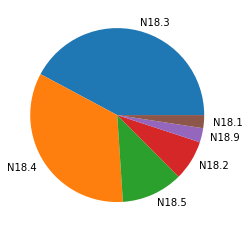

In [74]:
# ckd = pd.Series(ckd).value_counts()
print(ckd)
plt.pie(ckd.values, labels=list(ckd.index))
plt.show()

### HTN, CAD, DM, DCM, AFib, CHF most common

In [91]:
commonicd = dgs.icd.value_counts()[:40]
for i, c in commonicd.items():
  # print(i, icd.get_description(i), c)
  print(str(c).ljust(8), i, icd.get_description(i))

19526    I10 Essential (primary) hypertension
7256     I25.9 Chronic ischaemic heart disease, unspecified
4771     E11.9 Type 2 diabetes mellitus without complications
4607     E10.7 Type 1 diabetes mellitus with multiple complications
3700     E11.7 Type 2 diabetes mellitus with multiple complications
3402     I42.0 Dilated cardiomyopathy
3144     I48.1 Persistent atrial fibrillation
3109     E78.2 Mixed hyperlipidaemia
3095     I50.0 Congestive heart failure
2918     I25.8 Other forms of chronic ischaemic heart disease
2692     I48.0 Paroxysmal atrial fibrillation
2331     E10.9 Type 1 diabetes mellitus without complications
2097     E06.3 Autoimmune thyroiditis
1987     I34.0 Mitral (valve) insufficiency
1811     I50.1 Left ventricular failure
1730     E11.8 Type 2 diabetes mellitus with unspecified complications
1555     E78.0 Pure hypercholesterolaemia
1358     E78.9 Disorder of lipoprotein metabolism, unspecified
1304     Z95.0 Presence of electronic cardiac devices
1284     I35.

### Circulatory and Metabolic Medicine

In [112]:
specialty = list()
for i in dgs.icd:
  try:
    sg = icd.get_parent(i[:3])
    s = icd.get_parent(sg)
    specialty.append((icd.get_description(s), sg[0]))
  except:
    pass
pd.Series(specialty).value_counts()

(Diseases of the circulatory system, I)                                                                                                  70734
(Endocrine, nutritional and metabolic diseases, E)                                                                                       34231
(Diseases of the digestive system, K)                                                                                                    12447
(Factors influencing health status and contact with health services, Z)                                                                   4279
(Diseases of the respiratory system, J)                                                                                                   2610
(Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism, D)                                  1893
(Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified, R)                                              1723

In [115]:
demogr.Sex.value_counts()

M    8326
F    7244
Name: Sex, dtype: int64

## Laboratory Data

In [7]:
lab.columns

Index(['Patient', 'Report', 'ID', 'EntryDate', 'EntryTime', 'Code', 'NCLP',
       'Analyte', 'ValueNumber', 'ValueText', 'RefHigh', 'RefLow', 'Unit'],
      dtype='object')

In [8]:
# drop some of the lab columns
lab = lab.drop(["Report", "ID", "EntryTime", "Code", "NCLP", "RefHigh", "RefLow"], axis=1)
lab.head()

,Patient,EntryDate,Analyte,ValueNumber,ValueText,Unit
0,324729,30.09.2022,HBsAg konfirmace,NaN,externě,NaN
1,324729,30.09.2022,Rotaviry + Noroviry stolice,NaN,odběr,NaN
2,324729,16.04.2015,s_vápník celk.,2.37,NaN,mmol/l
3,324729,16.04.2015,s_fosfor,1.32,NaN,mmol/l
4,324729,16.04.2015,s_hořčík,0.75,NaN,mmol/l


In [9]:
lab.isna().sum()
# the lab data is messy

Patient             0
EntryDate           1
Analyte             1
ValueNumber     19326
ValueText      122845
Unit            20471
dtype: int64